<a href="https://colab.research.google.com/github/faizanaliehsan/Final-project/blob/main/Brain_Tumor_Classification_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Required ModuleszXCVBNM,./

In [ ]:
import os                                    # Provides functions to interact with the operating system
from glob import glob                        # Allows file pattern matching

# Image processing libraries
from PIL import Image                        # Pillow library for image manipulation
import numpy as np                           # Fundamental package for scientific computing with Python

# Data manipulation and visualization libraries
import pandas as pd                          # Data manipulation and analysis library
import matplotlib.pyplot as plt              # Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns                        # Statistical data visualization library based on matplotlib

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets

# Deep learning libraries
import tensorflow as tf                      # Open-source machine learning framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates batches of tensor image data with real-time data augmentation

# Suppress warnings
import warnings                              # Provides a way to ignore warnings
warnings.filterwarnings("ignore")            # Ignore all warnings

# Importing the Images from Google Drive

In [ ]:
def generate_dataframe_from_directory(directory_path):
    """
    Generates a DataFrame containing the class labels and corresponding image paths from the given directory.

    Parameters:
    directory_path (str): Path to the directory containing subdirectories of images, where each subdirectory is named after its class label.

    Returns:
    pd.DataFrame: A DataFrame with two columns - 'Image Path' and 'Class Label'.
    """
    class_labels, image_paths = zip(*[
        (class_name, os.path.join(directory_path, class_name, image_name))
        for class_name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, class_name))
        for image_name in os.listdir(os.path.join(directory_path, class_name))
    ])

    dataframe = pd.DataFrame({'Image Path': image_paths, 'Class Label': class_labels})
    return dataframe

def generate_test_dataframe(test_directory_path):
    """
    Generates a DataFrame containing the class labels and corresponding image paths from the given test directory.

    Parameters:
    test_directory_path (str): Path to the directory containing subdirectories of images, where each subdirectory is named after its class label.

    Returns:
    pd.DataFrame: A DataFrame with two columns - 'Image Path' and 'Class Label'.
    """
    class_labels, image_paths = zip(*[
        (class_name, os.path.join(test_directory_path, class_name, image_name))
        for class_name in os.listdir(test_directory_path) if os.path.isdir(os.path.join(test_directory_path, class_name))
        for image_name in os.listdir(os.path.join(test_directory_path, class_name))
    ])

    dataframe = pd.DataFrame({'Image Path': image_paths, 'Class Label': class_labels})
    return dataframe

# Importing Traing Images

In [ ]:
tr_df = generate_dataframe_from_directory('/content/drive/MyDrive/MRI Brain Tumor Image Classification /Training')

In [ ]:
tr_df

,Image Path,Class Label
0,/content/drive/MyDrive/MRI Brain Tumor Image C...,notumor
1,/content/drive/MyDrive/MRI Brain Tumor Image C...,notumor
2,/content/drive/MyDrive/MRI Brain Tumor Image C...,notumor
3,/content/drive/MyDrive/MRI Brain Tumor Image C...,notumor
4,/content/drive/MyDrive/MRI Brain Tumor Image C...,notumor
...,...,...
5707,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
5708,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
5709,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
5710,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma


# Importing the Test Images

In [ ]:
ts_df = generate_test_dataframe('/content/drive/MyDrive/MRI Brain Tumor Image Classification /Testing')

In [ ]:
ts_df

,Image Path,Class Label
0,/content/drive/MyDrive/MRI Brain Tumor Image C...,pituitary
1,/content/drive/MyDrive/MRI Brain Tumor Image C...,pituitary
2,/content/drive/MyDrive/MRI Brain Tumor Image C...,pituitary
3,/content/drive/MyDrive/MRI Brain Tumor Image C...,pituitary
4,/content/drive/MyDrive/MRI Brain Tumor Image C...,pituitary
...,...,...
1306,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
1307,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
1308,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma
1309,/content/drive/MyDrive/MRI Brain Tumor Image C...,glioma


# Distribution of Classes in Training and Test Set

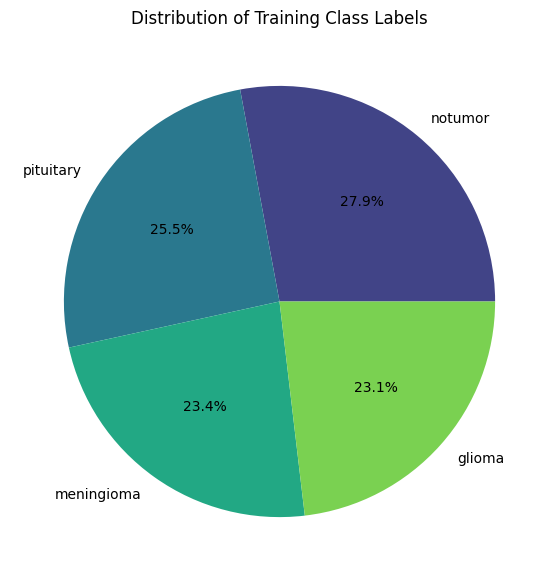

In [ ]:
# Count the occurrences of each class label
class_counts = tr_df['Class Label'].value_counts()

# Define a color palette with different colors
colors = sns.color_palette('viridis', len(class_counts))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Training Class Labels')
plt.show()

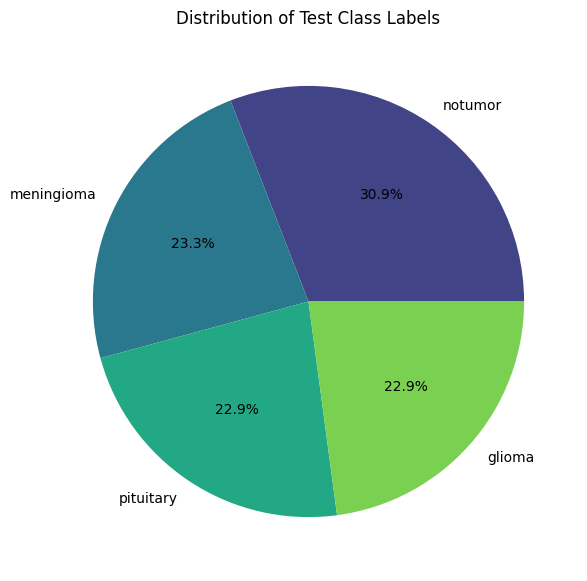

In [ ]:
# Count the occurrences of each class label
class_counts = ts_df['Class Label'].value_counts()

# Define a color palette with different colors
colors = sns.color_palette('viridis', len(class_counts))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Test Class Labels')
plt.show()

# Data Preprocessing

**Images before preprocessing**

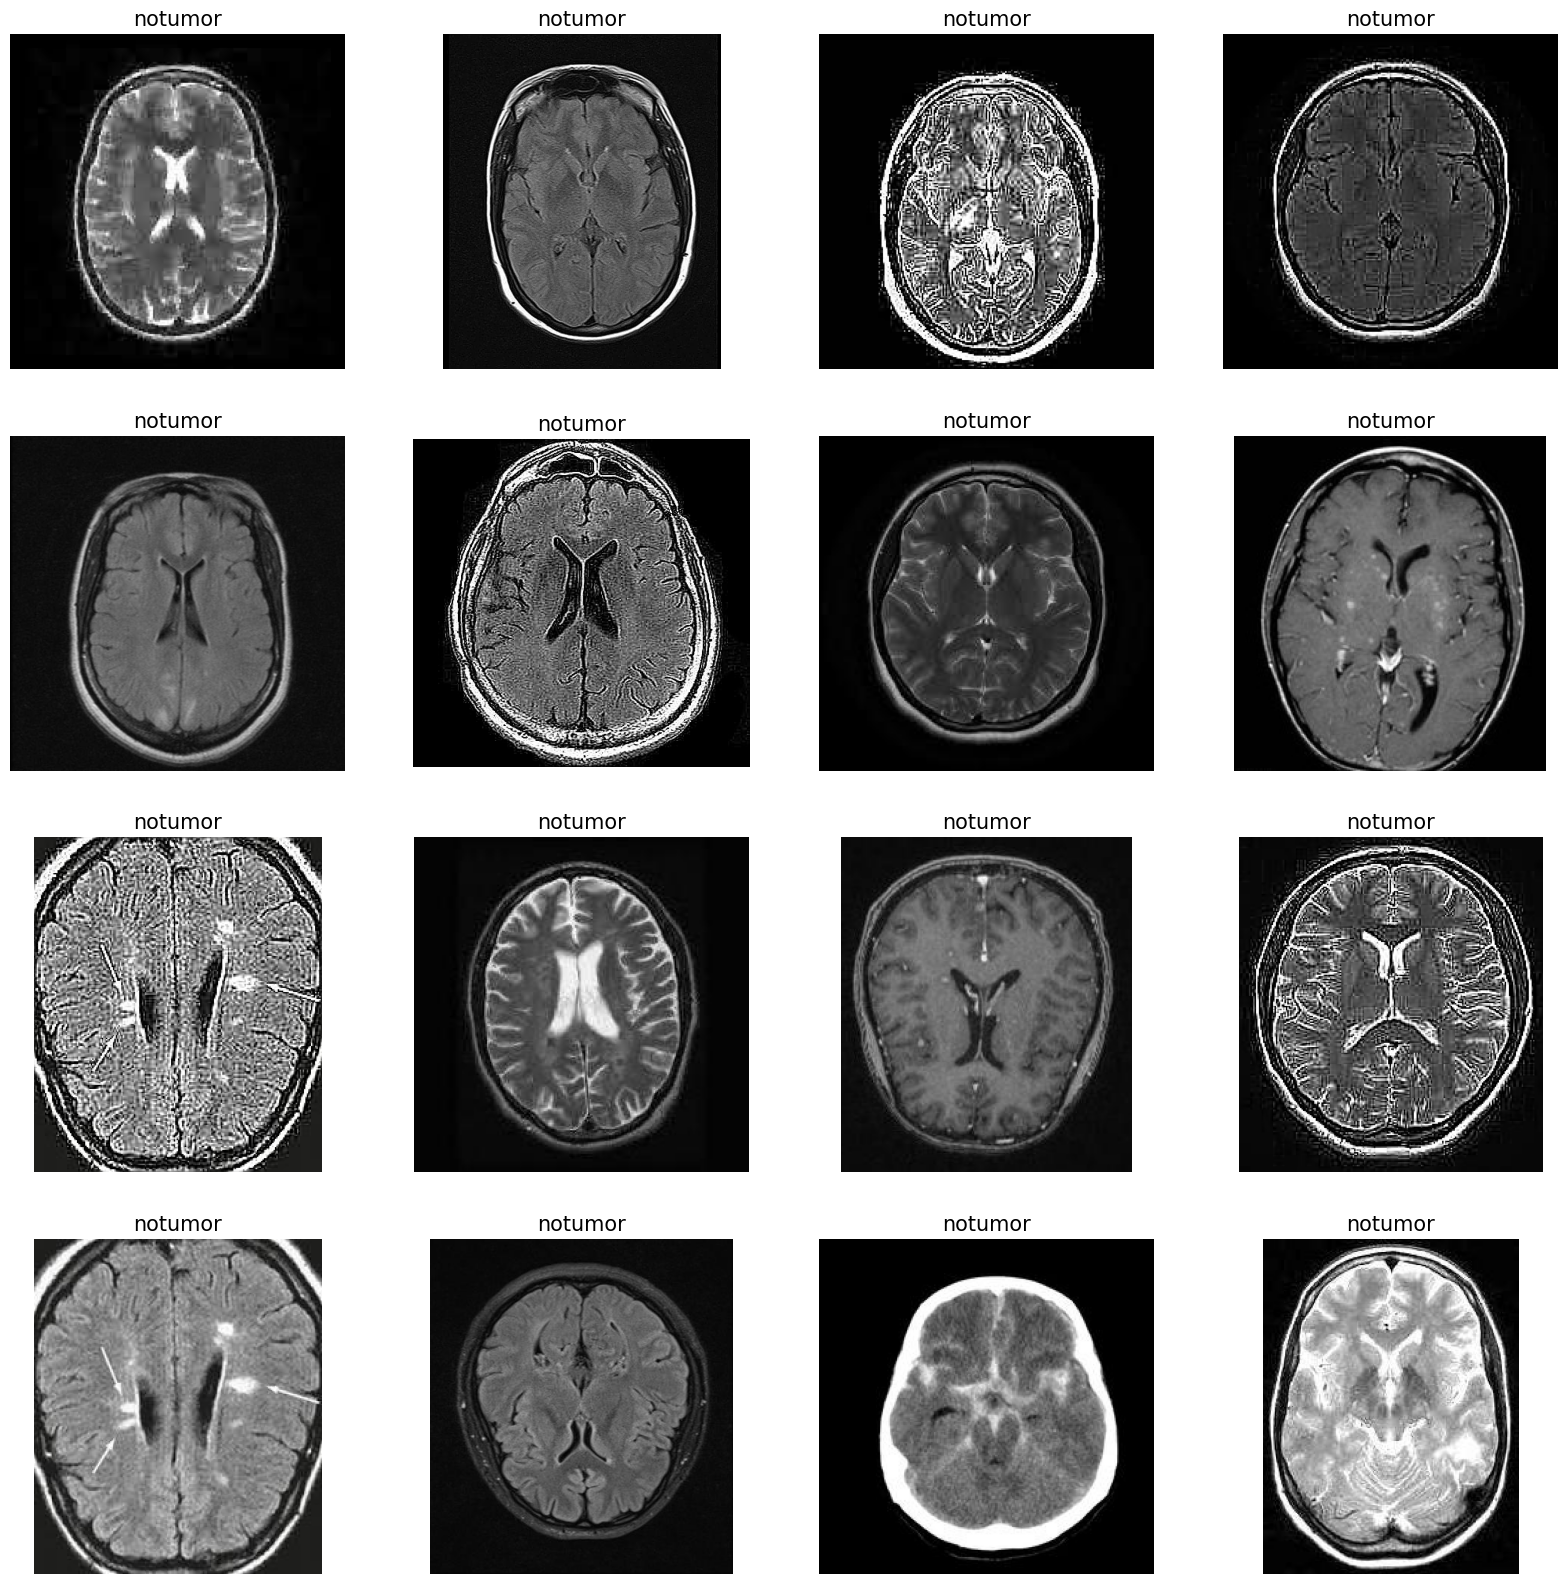

In [ ]:
# Number of images to display
num_images = 16

# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Iterate over the images and their corresponding labels
for i in range(num_images):
    # Read image path and label from DataFrame
    image_path = tr_df.loc[i, 'Image Path']
    label = tr_df.loc[i, 'Class Label']

    # Load the image
    image = Image.open(image_path)

    # Create a subplot in a 4x4 grid
    plt.subplot(4, 4, i + 1)

    # Display the image
    plt.imshow(image)

    # Set the title of the subplot to the class name
    plt.title(label, color='k', fontsize=15)
    plt.axis('off')  # Hide the axes

# Display the figure with all subplots
plt.show()

**Spliting the data into Validation and Test set**

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class Label'])

**Applying Data Augmentation and Preprocssing Steps**

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


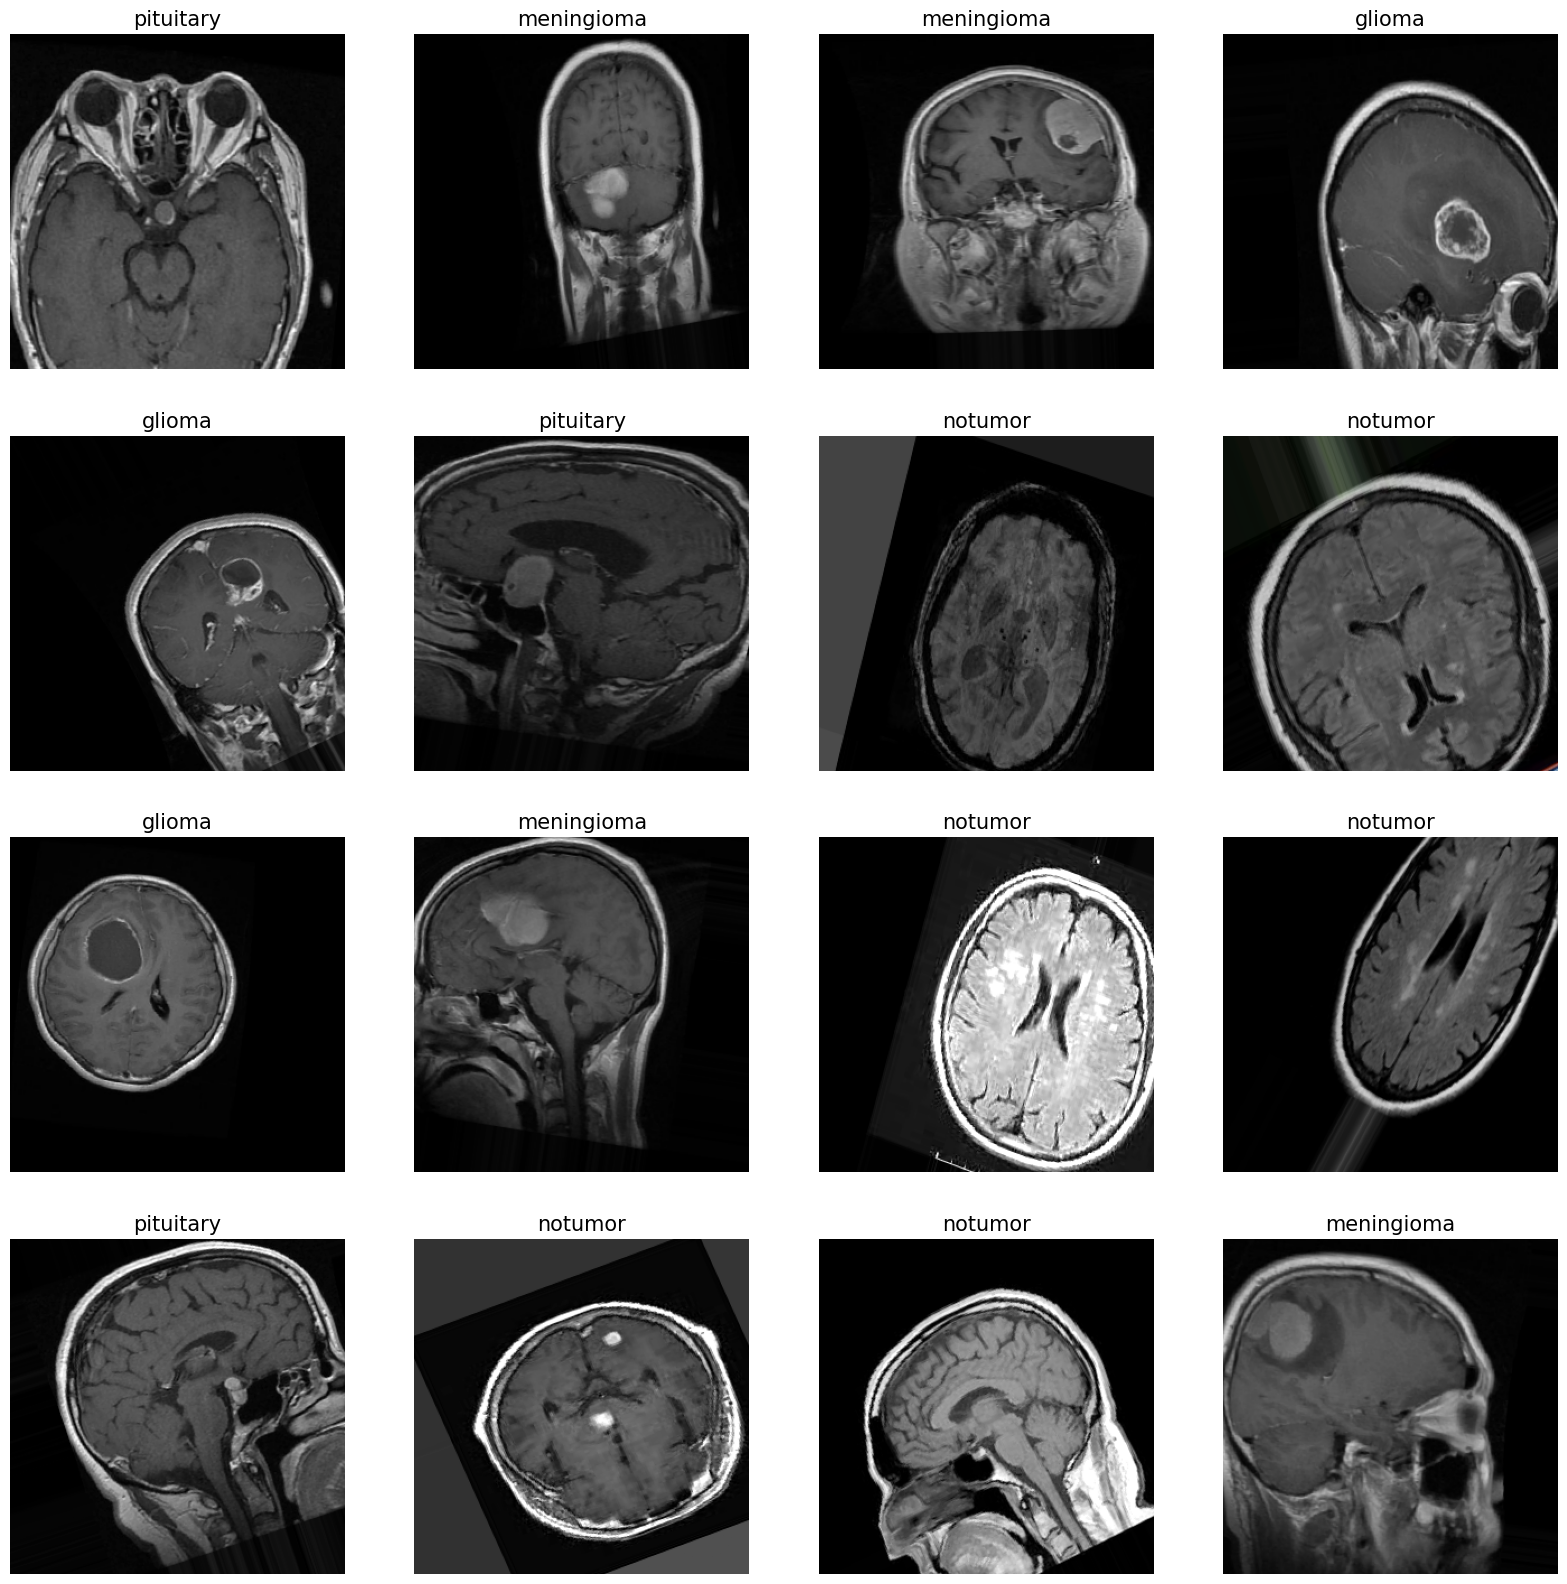

In [ ]:
# Parameters
batch_size = 32
img_size = (299, 299)
brightness_range = (0.8, 1.2)
rescale_factor = 1/255

# Define data augmentation parameters for training
train_data_gen_args = dict(
    rescale=rescale_factor,
    brightness_range=brightness_range,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data augmentation parameters for validation and testing (usually less augmentation)
valid_test_data_gen_args = dict(rescale=rescale_factor)

# Create ImageDataGenerators with parameters
train_val_gen = ImageDataGenerator(**train_data_gen_args)
valid_test_gen = ImageDataGenerator(**valid_test_data_gen_args)

# Function to create generators from dataframes
def create_generators(tr_df, valid_df, ts_df, batch_size, img_size):
    if tr_df.empty or valid_df.empty or ts_df.empty:
        raise ValueError("One of the dataframes is empty. Please check your dataframes.")

    train_gen = train_val_gen.flow_from_dataframe(
        tr_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'  # Assuming you have categorical labels
    )

    valid_gen = valid_test_gen.flow_from_dataframe(
        valid_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'
    )

    test_gen_flow = valid_test_gen.flow_from_dataframe(
        ts_df,
        x_col='Image Path',
        y_col='Class Label',
        batch_size=16,
        target_size=img_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_gen, valid_gen, test_gen_flow

# Assuming tr_df, valid_df, ts_df are defined and not empty
train_gen, valid_gen, test_gen_flow = create_generators(tr_df, valid_df, ts_df, batch_size, img_size)

# Visualize some augmented images from the training generator
images, labels = next(train_gen)
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(20, 20))
for i in range(min(len(images), 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    class_name = class_names[np.argmax(labels[i])]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')
plt.show()